<h1>The Lorenz System</h1>

<h2>1. The Lorenz System of differential equations</h2>

<p>The Lorenz system of differential equations are given by:</p>

$$\frac{dx}{dt} = \sigma (y - x)$$
$$\frac{dy}{dt} = x(\rho - z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$

<p>The equations were originally used as simple convection models for the atmosphere. The system exhibits chaos and is the foundation of the modern mathematical study of chaos.</p>

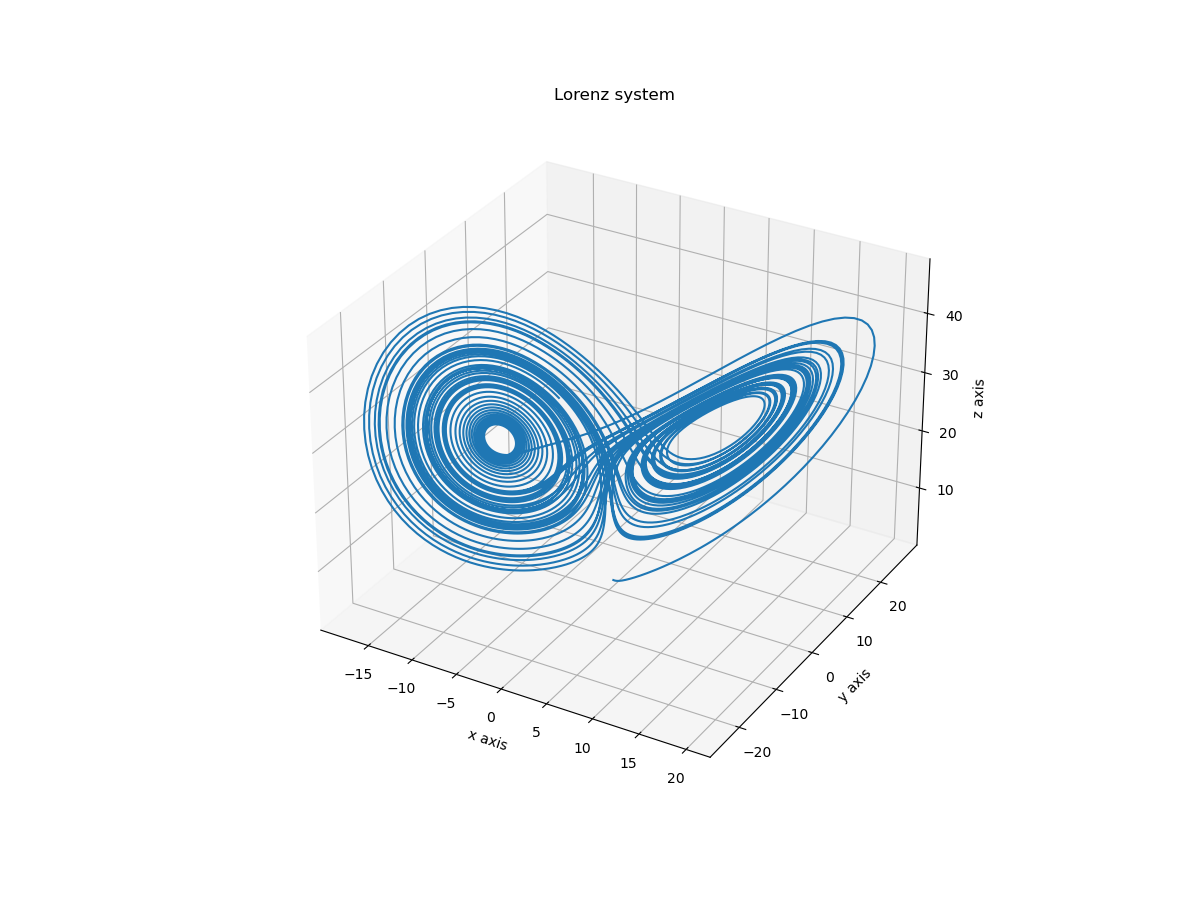

In [16]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

#Lorenz system
def f(r: tuple, params):
    x, y, z = r
    sigma, rho, beta = params
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta * z
    return dx, dy, dz

#RK4 solver for IVP
def RK4(func, init: tuple, t0: float, numSteps: int, params: tuple, maxTime = 10.0):
    h = (maxTime - t0)/numSteps
    prevPosition = init
    x0, y0, z0 = prevPosition
    x = []
    y = []
    z = []
    x0, y0, z0 = prevPosition

    for i in range(0, numSteps):
        k0, l0, m0 = func(prevPosition, params)
        k1, l1, m1 = func((x0 + h * k0/2, y0 + h * l0/2, z0 + h * m0/2), params)
        k2, l2, m2 = func((x0 + h * k1/2, y0 + h * l1/2, z0 + h * m1/2), params)
        k3, l3, m3 = func((x0 + h * k2, y0 + h * l2, z0 + h * m2), params)
        x0 = x0 + h/6 * (k0 + 2*k1 + 2*k2 + k3)
        y0 = y0 + h/6 * (l0 + 2*l1 + 2*l2 + l3)
        z0 = z0 + h/6 * (m0 + 2*m1 + 2*m2 + m3)
        x.append(x0)
        y.append(y0)
        z.append(z0)
    return x, y, z

x, y, z = RK4(func = f, init = (0., 1., 1.05), t0 = 0, numSteps = 10000, params = (10, 28, 2.667), maxTime = 70)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

ax.set_title("Lorenz system")
ax.plot(x,y,z)

plt.show()



